In [1]:
from bids import BIDSLayout

In [25]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np

In [66]:
import pandas as pd

In [4]:
layout = BIDSLayout(root='test_example', derivatives=True)

In [5]:
mbmvap_layout = layout.derivatives['MB-MVPA']

In [70]:
subject = '01'
run= '1'
feature_name = 'zoom2' 
task_name = 'mixedgambletask'
process_name = 'SUgamble'
t_r = 2.0

In [286]:
def plot_data(mbmvpa_layout, subject,run,feature_name,task_name,process_name,t_r,w=14, h=7, fontsize=15):
    
    signal_file = mbmvpa_layout.get(subject=subject, run=run, desc=process_name,suffix='signal')[0]
    modulation_file = mbmvpa_layout.get(subject=subject, run=run, desc=process_name,suffix='modulation')[0]
    timemask_file = mbmvpa_layout.get(subject=subject, run=run, desc=process_name,suffix='timemask')[0]
    feature_file = mbmvpa_layout.get(subject=subject, run=run, desc=feature_name,suffix='voxelfeature')[0]
    
    fig = plt.figure(figsize=(w,h*2))
    add_voxel_feature_subplot(feature_file, t_r, ax_idx=1, fig=fig, total_number=2,fontsize=fontsize, skip_xlabel=True)
    add_latent_process_subplot(modulation_file, signal_file, timemask_file, t_r, ax_idx=2, fig=fig, total_number=2,fontsize=fontsize)
                     

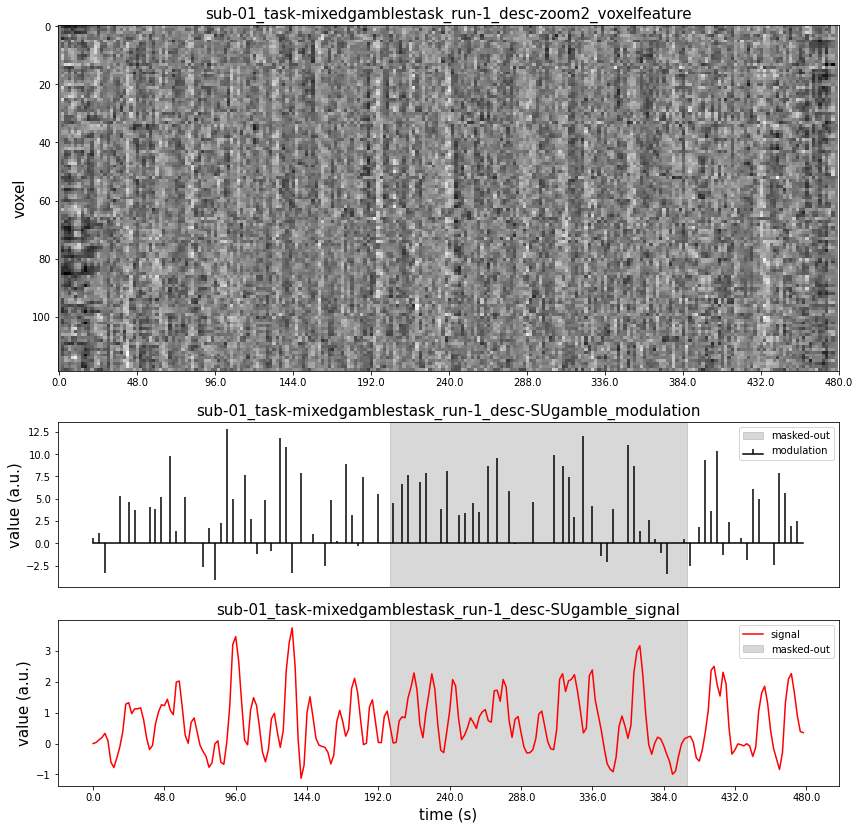

In [287]:
plot_data(mbmvap_layout, subject,run,feature_name,task_name,process_name,t_r,w=14, h=7, fontsize=15)

In [63]:
mbmvap_layout.get(subject=subject, run=run, desc=process_name)

[<BIDSDataFile filename='/home/cheoljun/project_model_based_fmri/tests/test_example/derivatives/mbmvpa/sub-01/func/sub-01_task-mixedgamblestask_run-1_desc-SUgamble_modulation.tsv'>,
 <BIDSFile filename='/home/cheoljun/project_model_based_fmri/tests/test_example/derivatives/mbmvpa/sub-01/func/sub-01_task-mixedgamblestask_run-1_desc-SUgamble_signal.npy'>,
 <BIDSFile filename='/home/cheoljun/project_model_based_fmri/tests/test_example/derivatives/mbmvpa/sub-01/func/sub-01_task-mixedgamblestask_run-1_desc-SUgamble_timemask.npy'>]

In [278]:
feature_file

<BIDSFile filename='/home/cheoljun/project_model_based_fmri/tests/test_example/derivatives/mbmvpa/sub-01/func/sub-01_task-mixedgamblestask_run-1_desc-zoom2_voxelfeature.npy'>

In [154]:
latent_process_dict = {'signal_file':mbmvap_layout.get(subject=subject, run=run, desc=process_name,suffix='signal')[0],
                      'modulation_file':mbmvap_layout.get(subject=subject, run=run, desc=process_name,suffix='modulation')[0],
                      'timemask_file':mbmvap_layout.get(subject=subject, run=run, desc=process_name,suffix='timemask')[0],
                      't_r':2.0}

In [71]:
signal = np.load(latent_process_dict['signal_file'])
modulation = pd.read_table(latent_process_dict['modulation_file'])
timemask = np.load(latent_process_dict['timemask_file'])

In [119]:
timemask[100:200] = 0

In [96]:
n_scan = len(signal)
mod_array = np.zeros(n_scan)

for _, row in modulation.iterrows():
    onset_idx = int(float(row['onset'])/t_r)
    end_idx = int((float(row['onset'])+float(row['duration']))/t_r)
    mod_val = float(row['modulation'])
    mod_array[onset_idx:end_idx+1]=mod_val
                

In [114]:
def timemask2unvalidrange(timemask): 
    tm_chnks = []
    is_valid = -1
    for i,v in enumerate(1-timemask):
        if v > 0 and is_valid <=0:
            sid = i
            is_valid = 1
        elif v<= 0 and is_valid >0:
            tm_chnks.append((sid,i))
            is_valid = 0
        else:
            continue
    if is_valid >0:
        tm_chnks.append((sid,len(timemask)))
        
    return tm_chnks
        

def make_finer(array, target_length=500):
    finer_arr = np.zeros(target_length)
    for i,v in enumerate(array):
        if v != 0:
            finer_arr[int(i/len(array)*target_length)] = v
    return finer_arr

In [ ]:
fig = plt.figure(figsize=(14,7))
ax = 

<Figure size 1008x504 with 0 Axes>

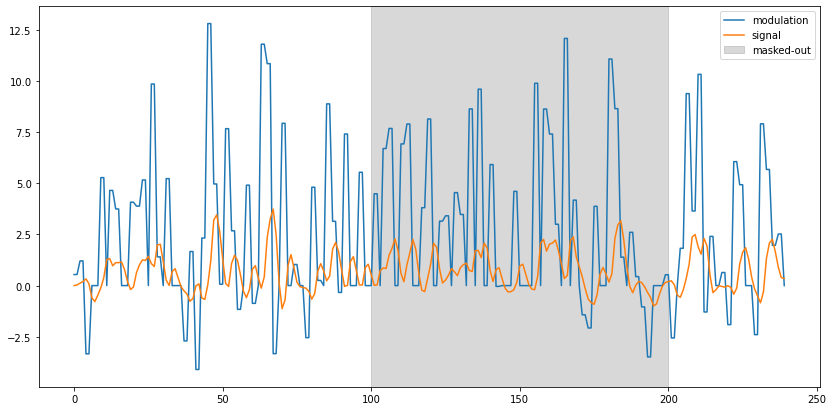

In [138]:
fig = plt.figure(figsize=(14,7))
plt.figure(figsize=(14,7))
plt.plot(mod_array, label='modulation')
plt.plot(signal, label='signal')
for (si,ei) in timemask2unvalidrange(timemask):
    plt.axvspan(si, ei,color='gray', alpha=.3, lw=1, label='masked-out')
plt.legend()

In [75]:
signal.shape

(240, 1)

In [21]:
feature = np.load(feature_file)

In [23]:
feature.shape

(240, 119)

In [34]:
feature_files = [feature_file, feature_file]

In [136]:

def plot_voxel_feature(feature_files, w=14, h=7, fontsize=15):
    fig = plt.figure(figsize=(w,h*len(feature_files)))
    for i, feature_file in enumerate(feature_files):
                                
        ax = fig.add_subplot(len(feature_files), 1, i+1)
        feature = np.load(feature_file)
        ax.imshow(feature, interpolation='nearest', aspect='auto', cmap='gray')
        ax.set_xlabel('time (a.u.)',fontsize=fontsize)
        ax.set_ylabel('voxel',fontsize=fontsize)
        ax.set_title(feature_file.filename, fontsize=fontsize)

In [270]:
def add_latent_process_subplot(modulation_file, signal_file, timemask_file, t_r, ax_idx=1, fig=None, total_number=1,fontsize=15,skip_xlabel=False):
    if fig is None:
        fig = plt.figure(figsize=(14,7))
    
    
    modulation_file = Path(modulation_file)
    signal_file = Path(signal_file)
    timemask_file = Path(timemask_file)
    signal = np.load(signal_file)
    modulation = pd.read_table(modulation_file)
    
    n_scan = len(signal)
    mod_array = np.zeros(n_scan)

    for _, row in modulation.iterrows():
        onset_idx = int(float(row['onset'])/t_r)
        end_idx = int((float(row['onset'])+float(row['duration']))/t_r)
        mod_val = float(row['modulation'])
        mod_array[onset_idx:end_idx+1]=mod_val
                
        
    timemask = np.load(timemask_file)
    timemask[100:200] = 0
    timemask_ranges = []
    is_valid = -1
    for i,v in enumerate(1-timemask):
        if v > 0 and is_valid <=0:
            sid = i
            is_valid = 1
        elif v<= 0 and is_valid >0:
            timemask_ranges.append((sid,i))
            is_valid = 0
        else:
            continue
    if is_valid >0:
        timemask_ranges.append((sid,len(timemask)))
            
    
    
    ax_mod = fig.add_subplot(total_number*2, 1, 2*ax_idx-1)
    ax_mod.stem(mod_array, label='modulation',linefmt='black', markerfmt=' ',basefmt="black")
    for (si,ei) in timemask2unvalidrange(timemask):
        ax_mod.axvspan(si, ei,color='gray', alpha=.3, lw=1, label='masked-out')
    ax_mod.set_title(modulation_file.stem, fontsize=fontsize)
    ax_mod.get_xaxis().set_visible(False)
    ax_mod.set_ylabel('value (a.u.)',fontsize=fontsize)
    ax_mod.legend()
    
    
    ax_signal = fig.add_subplot(total_number*2, 1, 2*ax_idx)
    ax_signal.plot(signal, label='signal', color='red')
    for (si,ei) in timemask2unvalidrange(timemask):
        ax_signal.axvspan(si, ei,color='gray', alpha=.3, lw=1, label='masked-out')
    ax_signal.set_title(signal_file.stem, fontsize=fontsize)
    ax_signal.set_ylabel('value (a.u.)',fontsize=fontsize)
    ax_signal.set_xlabel('time (s)',fontsize=fontsize)
    xticks = np.arange(0,n_scan+1,n_scan//10)
    xticklabels = xticks*t_r
    ax_signal.set_xticks(xticks)
    ax_signal.set_xticklabels(xticklabels)
    ax_signal.legend()
    

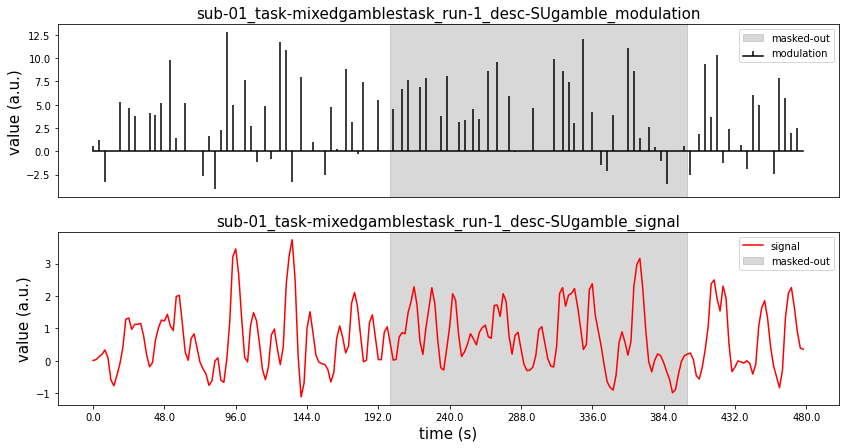

In [271]:
add_latent_process_subplot(Path(latent_process_dict['modulation_file'].path),
                           Path(latent_process_dict['signal_file'].path),
                           Path(latent_process_dict['timemask_file'].path),
                                                                    latent_process_dict['t_r'],
                           ax_idx=1, fig=None, total_number=1,fontsize=15)

In [285]:
def add_voxel_feature_subplot(feature_file, t_r, ax_idx=1, fig=None, total_number=1,fontsize=15,skip_xlabel=False):
    if fig is None:
        fig = plt.figure(figsize=(14,7))
    feature_file = Path(feature_file)
    ax = fig.add_subplot(total_number, 1, ax_idx)
    feature = np.load(feature_file)
    ax.imshow(feature.T, interpolation='nearest', aspect='auto', cmap='gray')
    if not skip_xlabel:
        ax.set_xlabel('time (sec)',fontsize=fontsize)
    ax.set_ylabel('voxel',fontsize=fontsize)
    n_scan = feature.shape[0]
    xticks = np.arange(0,n_scan+1,n_scan//10)
    xticklabels = xticks*t_r
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_title(Path(feature_file).stem, fontsize=fontsize)
    

In [276]:
from pathlib import Path

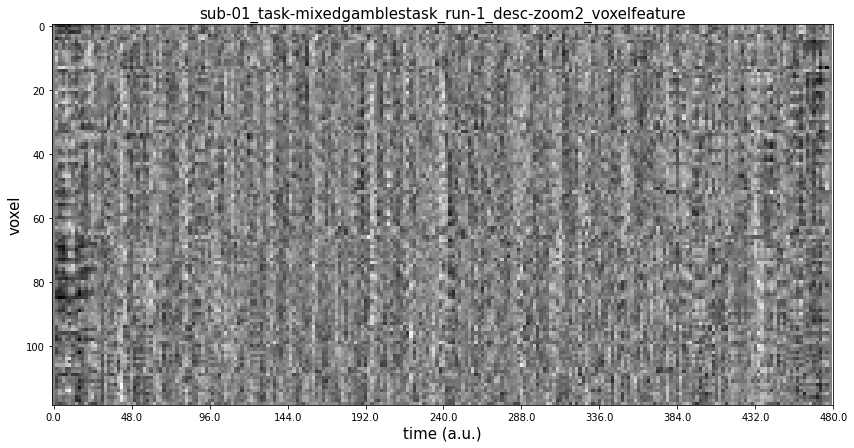

In [277]:
add_voxel_feature_subplot(Path(feature_file.path),t_r=2.0, ax_idx=1, fig=None, total_number=1)

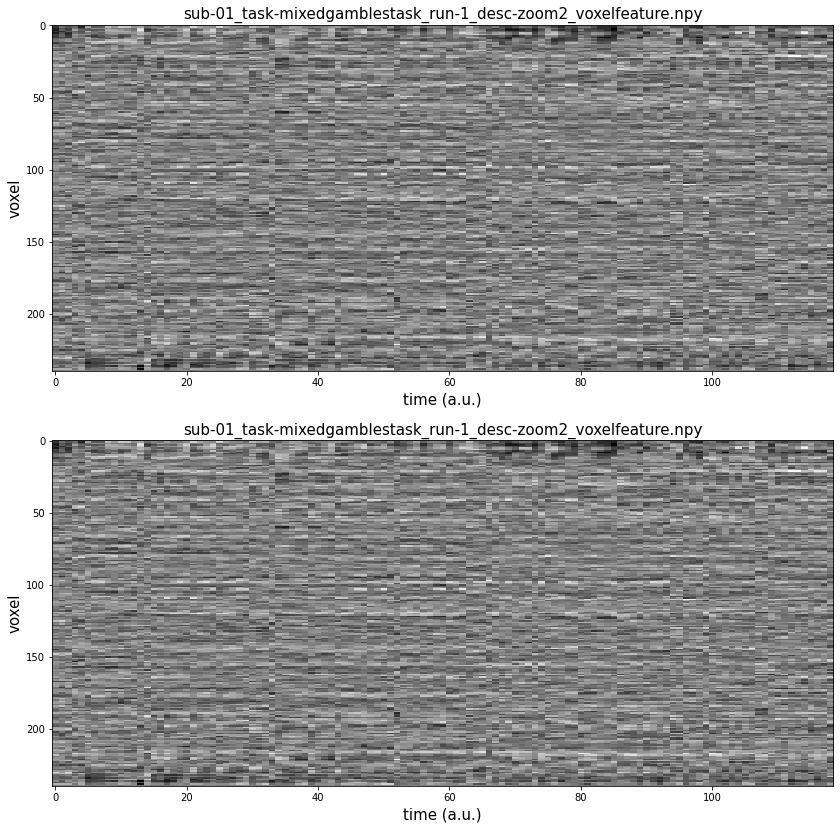

In [54]:
plot_voxel_feature(feature_files)

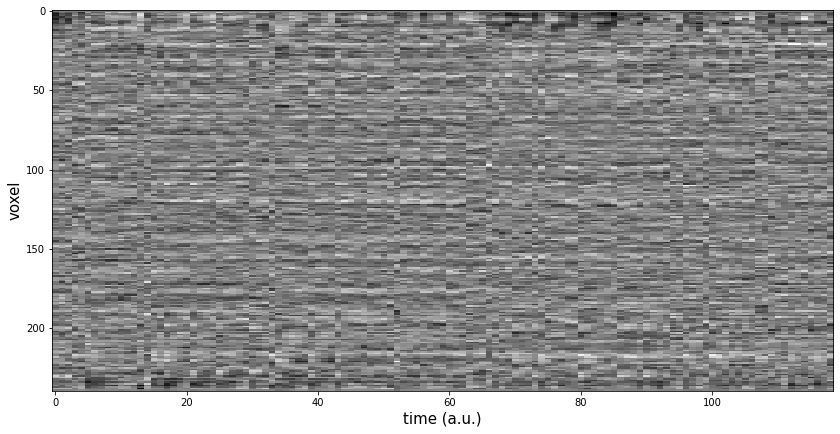

In [32]:
plt.figure(figsize=(14,7))
plt.imshow(feature, interpolation='nearest', aspect='auto', cmap='gray')
plt.xlabel('time (a.u.)',fontsize=15)
plt.ylabel('voxel',fontsize=15)
plt.show()